In [9]:
#資料來源
#https://youtu.be/wIvxFEMQVwg 16分鐘
#https://youtu.be/CxguC-duCZM 11分鐘
#處理數據
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd
from sanbomics.tools import id_map #查詢資料庫並加上GeneSymbol
import scanpy as sc #做PCA圖
#做GSEA圖
import gseapy as gp
from gseapy.plot import gseaplot #設定GSEA圖的格式
import matplotlib.pyplot as plt #設定GSEA圖的字型、字體大小
#做heatmap圖
import numpy as np
import seaborn as sns
#export CSV
import csv

In [10]:
counts = pd.read_csv('GSE225253_fpkm.matrix_all_samples_3.csv')
counts

,GeneID,HK-2 normoxia-1,HK-2 normoxia-2,HK-2 normoxia-3,HK-2 hypoxia-1,HK-2 hypoxia-2,HK-2 hypoxia-3
0,ENSG00000000003.10,24.84,23.27,22.37,19.56,20.69,19.98
1,ENSG00000000005.5,0.00,0.00,0.00,0.00,0.00,0.00
2,ENSG00000000419.8,113.54,106.56,107.44,75.97,84.04,91.20
3,ENSG00000000457.9,2.52,1.97,2.47,2.23,2.77,2.18
4,ENSG00000000460.12,9.26,10.21,10.63,8.61,9.20,8.42
...,...,...,...,...,...,...,...
57815,ENSGR0000264819.1,0.00,0.00,0.00,0.00,0.00,0.00
57816,ENSGR0000265350.1,0.00,0.00,0.00,0.00,0.00,0.00
57817,ENSGR0000265658.1,0.00,0.00,0.00,0.00,0.00,0.00
57818,ENSGR0000266731.1,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
counts = counts.set_index('GeneID')
counts

,HK-2 normoxia-1,HK-2 normoxia-2,HK-2 normoxia-3,HK-2 hypoxia-1,HK-2 hypoxia-2,HK-2 hypoxia-3
GeneID,,,,,,
ENSG00000000003.10,24.84,23.27,22.37,19.56,20.69,19.98
ENSG00000000005.5,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.8,113.54,106.56,107.44,75.97,84.04,91.20
ENSG00000000457.9,2.52,1.97,2.47,2.23,2.77,2.18
ENSG00000000460.12,9.26,10.21,10.63,8.61,9.20,8.42
...,...,...,...,...,...,...
ENSGR0000264819.1,0.00,0.00,0.00,0.00,0.00,0.00
ENSGR0000265350.1,0.00,0.00,0.00,0.00,0.00,0.00
ENSGR0000265658.1,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
# print (type(counts))
counts = counts.astype(int) #轉換成整數(無條件捨去)
counts

,HK-2 normoxia-1,HK-2 normoxia-2,HK-2 normoxia-3,HK-2 hypoxia-1,HK-2 hypoxia-2,HK-2 hypoxia-3
GeneID,,,,,,
ENSG00000000003.10,24,23,22,19,20,19
ENSG00000000005.5,0,0,0,0,0,0
ENSG00000000419.8,113,106,107,75,84,91
ENSG00000000457.9,2,1,2,2,2,2
ENSG00000000460.12,9,10,10,8,9,8
...,...,...,...,...,...,...
ENSGR0000264819.1,0,0,0,0,0,0
ENSGR0000265350.1,0,0,0,0,0,0
ENSGR0000265658.1,0,0,0,0,0,0


In [13]:
counts = counts[counts.sum(axis = 1) > 0] #去掉全都等於0的gene expression
counts

,HK-2 normoxia-1,HK-2 normoxia-2,HK-2 normoxia-3,HK-2 hypoxia-1,HK-2 hypoxia-2,HK-2 hypoxia-3
GeneID,,,,,,
ENSG00000000003.10,24,23,22,19,20,19
ENSG00000000419.8,113,106,107,75,84,91
ENSG00000000457.9,2,1,2,2,2,2
ENSG00000000460.12,9,10,10,8,9,8
ENSG00000000971.11,2,2,2,1,2,1
...,...,...,...,...,...,...
ENSGR0000182378.8,3,4,3,4,4,4
ENSGR0000182484.10,12,11,11,13,14,13
ENSGR0000197976.6,8,10,9,9,10,9


In [14]:
counts = counts.T #轉置
counts

GeneID,ENSG00000000003.10,ENSG00000000419.8,ENSG00000000457.9,ENSG00000000460.12,ENSG00000000971.11,ENSG00000001036.9,ENSG00000001084.6,ENSG00000001167.10,ENSG00000001460.13,ENSG00000001461.12,...,ENSGR0000167393.12,ENSGR0000169084.8,ENSGR0000169093.10,ENSGR0000169100.8,ENSGR0000178605.8,ENSGR0000182378.8,ENSGR0000182484.10,ENSGR0000197976.6,ENSGR0000214717.5,ENSGR0000236017.3
HK-2 normoxia-1,24,113,2,9,2,101,12,20,5,9,...,7,3,9,95,7,3,12,8,7,0
HK-2 normoxia-2,23,106,1,10,2,111,11,22,8,11,...,7,4,8,96,9,4,11,10,7,0
HK-2 normoxia-3,22,107,2,10,2,108,10,23,7,11,...,7,4,7,95,7,3,11,9,6,0
HK-2 hypoxia-1,19,75,2,8,1,101,9,13,7,12,...,9,3,6,101,6,4,13,9,4,1
HK-2 hypoxia-2,20,84,2,9,2,102,9,15,6,12,...,9,3,7,102,6,4,14,10,4,1
HK-2 hypoxia-3,19,91,2,8,1,105,8,15,5,11,...,8,3,8,104,5,4,13,9,4,1


In [3]:
print (type(counts))
counts.to_csv('counts.csv', index = True) #index=False

<class 'pandas.core.frame.DataFrame'>


In [4]:
counts['ENSG00000000003.10']

HK-2 normoxia-1    24
HK-2 normoxia-2    23
HK-2 normoxia-3    22
HK-2 hypoxia-1     19
HK-2 hypoxia-2     20
HK-2 hypoxia-3     19
Name: ENSG00000000003.10, dtype: int32

In [5]:
# 創建譯碼簿
metadata = pd.DataFrame(zip(counts.index, ['normoxia','normoxia','normoxia','hypoxia', 'hypoxia', 'hypoxia']),
                        columns = ['Sample', 'Condition'])
# metadata
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
HK-2 normoxia-1,normoxia
HK-2 normoxia-2,normoxia
HK-2 normoxia-3,normoxia
HK-2 hypoxia-1,hypoxia
HK-2 hypoxia-2,hypoxia
HK-2 hypoxia-3,hypoxia


In [6]:
#轉換成AnnData object in scanpy
dds = DeseqDataSet(counts=counts,
            metadata=metadata,
            design_factors="Condition")
dds
# dds.obs
# dds.X
# dds.var

#design_factors=["batch", "condition"] = ~ batch + condtion

AnnData object with n_obs × n_vars = 6 × 15665
    obs: 'Condition'
    obsm: 'design_matrix'

In [7]:
dds.deseq2()
dds

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.73 seconds.

Fitting dispersion trend curve...
... done in 0.23 seconds.

Fitting MAP dispersions...
... done in 1.46 seconds.

Fitting LFCs...
... done in 0.82 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



AnnData object with n_obs × n_vars = 6 × 15665
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks'

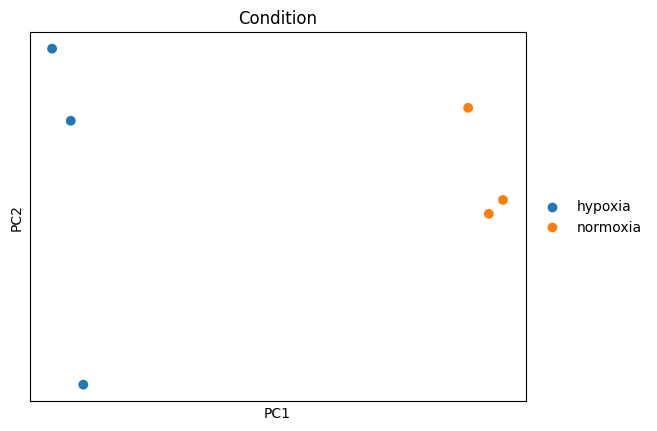

In [8]:
#使用scanpy，做PCA圖
# dds
sc.tl.pca(dds)
sc.pl.pca(dds, color = 'Condition', size = 200, save = None) #save = True/None

In [9]:
stat_res = DeseqStats(dds, contrast = ('Condition','hypoxia','normoxia'))
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition hypoxia vs normoxia
                     baseMean  log2FoldChange     lfcSE      stat    pvalue  \
GeneID                                                                        
ENSG00000000003.10  21.113956       -0.204838  0.331207 -0.618458  0.536274   
ENSG00000000419.8   95.682393       -0.337275  0.162472 -2.075894  0.037904   
ENSG00000000457.9    1.833178        0.309275  1.114644  0.277465  0.781423   
ENSG00000000460.12   8.978844       -0.168425  0.506409 -0.332586  0.739447   
ENSG00000000971.11   1.659011       -0.539553  1.182015 -0.456469  0.648053   
...                       ...             ...       ...       ...       ...   
ENSGR0000182378.8    3.668552        0.308567  0.790489  0.390349  0.696278   
ENSGR0000182484.10  12.334757        0.280195  0.432756  0.647466  0.517331   
ENSGR0000197976.6    9.159257        0.098077  0.502523  0.195168  0.845261   
ENSGR0000214717.5    5.306903       -0.691336  0.669071 -1.0332

... done in 0.54 seconds.



In [10]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneID,,,,,,
ENSG00000000003.10,21.113956,-0.204838,0.331207,-0.618458,0.536274,0.844348
ENSG00000000419.8,95.682393,-0.337275,0.162472,-2.075894,0.037904,0.213758
ENSG00000000457.9,1.833178,0.309275,1.114644,0.277465,0.781423,NaN
ENSG00000000460.12,8.978844,-0.168425,0.506409,-0.332586,0.739447,NaN
ENSG00000000971.11,1.659011,-0.539553,1.182015,-0.456469,0.648053,NaN
...,...,...,...,...,...,...
ENSGR0000182378.8,3.668552,0.308567,0.790489,0.390349,0.696278,NaN
ENSGR0000182484.10,12.334757,0.280195,0.432756,0.647466,0.517331,0.832222
ENSGR0000197976.6,9.159257,0.098077,0.502523,0.195168,0.845261,NaN


In [11]:
res.index = res.index.str.split('.').str[0] #去除GeneID的小數點(版本號碼)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneID,,,,,,
ENSG00000000003,21.113956,-0.204838,0.331207,-0.618458,0.536274,0.844348
ENSG00000000419,95.682393,-0.337275,0.162472,-2.075894,0.037904,0.213758
ENSG00000000457,1.833178,0.309275,1.114644,0.277465,0.781423,NaN
ENSG00000000460,8.978844,-0.168425,0.506409,-0.332586,0.739447,NaN
ENSG00000000971,1.659011,-0.539553,1.182015,-0.456469,0.648053,NaN
...,...,...,...,...,...,...
ENSGR0000182378,3.668552,0.308567,0.790489,0.390349,0.696278,NaN
ENSGR0000182484,12.334757,0.280195,0.432756,0.647466,0.517331,0.832222
ENSGR0000197976,9.159257,0.098077,0.502523,0.195168,0.845261,NaN


In [12]:
res['Rank'] = res.stat
res.sort_values(by='Rank',inplace=True)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Rank
GeneID,,,,,,,
ENSG00000228253,11984.289354,-1.283893,0.049234,-26.077344,6.589763e-150,1.128991e-146,-26.077344
ENSG00000198938,3639.693364,-1.519038,0.061177,-24.830358,4.215413e-136,5.777644e-133,-24.830358
ENSG00000198899,4671.051440,-1.149755,0.050668,-22.691722,5.407817e-114,4.632471e-111,-22.691722
ENSG00000212907,4852.798559,-0.734747,0.036561,-20.096614,7.900275e-90,3.867185e-87,-20.096614
ENSG00000198712,7550.992572,-1.183509,0.069628,-16.997685,8.542686e-65,3.081212e-62,-16.997685
...,...,...,...,...,...,...,...
ENSG00000102144,1341.373225,1.662053,0.069622,23.872648,5.893110e-126,5.769355e-123,23.872648
ENSG00000149925,1693.395813,1.053298,0.042879,24.564661,3.015560e-133,3.444272e-130,24.564661
ENSG00000104419,379.557715,4.714587,0.171065,27.560160,3.343540e-167,7.637761e-164,27.560160


In [13]:
#使用id_map安裝包，加上GeneSymbol
mapper = id_map(species = 'human') #把ENSG00000210049轉換成GeneSymbol
mapper.mapper

{'ENSG00000210049': 'MT-TF',
 'ENSG00000211459': 'MT-RNR1',
 'ENSG00000210077': 'MT-TV',
 'ENSG00000210082': 'MT-RNR2',
 'ENSG00000209082': 'MT-TL1',
 'ENSG00000198888': 'MT-ND1',
 'ENSG00000210100': 'MT-TI',
 'ENSG00000210107': 'MT-TQ',
 'ENSG00000210112': 'MT-TM',
 'ENSG00000198763': 'MT-ND2',
 'ENSG00000210117': 'MT-TW',
 'ENSG00000210127': 'MT-TA',
 'ENSG00000210135': 'MT-TN',
 'ENSG00000210140': 'MT-TC',
 'ENSG00000210144': 'MT-TY',
 'ENSG00000198804': 'MT-CO1',
 'ENSG00000210151': 'MT-TS1',
 'ENSG00000210154': 'MT-TD',
 'ENSG00000198712': 'MT-CO2',
 'ENSG00000210156': 'MT-TK',
 'ENSG00000228253': 'MT-ATP8',
 'ENSG00000198899': 'MT-ATP6',
 'ENSG00000198938': 'MT-CO3',
 'ENSG00000210164': 'MT-TG',
 'ENSG00000198840': 'MT-ND3',
 'ENSG00000210174': 'MT-TR',
 'ENSG00000212907': 'MT-ND4L',
 'ENSG00000198886': 'MT-ND4',
 'ENSG00000210176': 'MT-TH',
 'ENSG00000210184': 'MT-TS2',
 'ENSG00000210191': 'MT-TL2',
 'ENSG00000198786': 'MT-ND5',
 'ENSG00000198695': 'MT-ND6',
 'ENSG00000210194': 

In [14]:
res['Symbol'] = res.index.map(mapper.mapper) #加上Symbol欄位
# print(res[['Symbol']])  #檢查 Symbol 欄位
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Rank,Symbol
GeneID,,,,,,,,
ENSG00000228253,11984.289354,-1.283893,0.049234,-26.077344,6.589763e-150,1.128991e-146,-26.077344,MT-ATP8
ENSG00000198938,3639.693364,-1.519038,0.061177,-24.830358,4.215413e-136,5.777644e-133,-24.830358,MT-CO3
ENSG00000198899,4671.051440,-1.149755,0.050668,-22.691722,5.407817e-114,4.632471e-111,-22.691722,MT-ATP6
ENSG00000212907,4852.798559,-0.734747,0.036561,-20.096614,7.900275e-90,3.867185e-87,-20.096614,MT-ND4L
ENSG00000198712,7550.992572,-1.183509,0.069628,-16.997685,8.542686e-65,3.081212e-62,-16.997685,MT-CO2
...,...,...,...,...,...,...,...,...
ENSG00000102144,1341.373225,1.662053,0.069622,23.872648,5.893110e-126,5.769355e-123,23.872648,PGK1
ENSG00000149925,1693.395813,1.053298,0.042879,24.564661,3.015560e-133,3.444272e-130,24.564661,ALDOA
ENSG00000104419,379.557715,4.714587,0.171065,27.560160,3.343540e-167,7.637761e-164,27.560160,NDRG1


In [15]:
print (type(res))
res.to_csv('out.csv', index=False)

<class 'pandas.core.frame.DataFrame'>


In [16]:
df = pd.read_csv('out.csv')
df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Rank,Symbol
0,11984.289354,-1.283893,0.049234,-26.077344,6.589763e-150,1.128991e-146,-26.077344,MT-ATP8
1,3639.693364,-1.519038,0.061177,-24.830358,4.215413e-136,5.777644e-133,-24.830358,MT-CO3
2,4671.051440,-1.149755,0.050668,-22.691722,5.407817e-114,4.632471e-111,-22.691722,MT-ATP6
3,4852.798559,-0.734747,0.036561,-20.096614,7.900275e-90,3.867185e-87,-20.096614,MT-ND4L
4,7550.992572,-1.183509,0.069628,-16.997685,8.542686e-65,3.081212e-62,-16.997685,MT-CO2
...,...,...,...,...,...,...,...,...
15660,1341.373225,1.662053,0.069622,23.872648,5.893110e-126,5.769355e-123,23.872648,PGK1
15661,1693.395813,1.053298,0.042879,24.564661,3.015560e-133,3.444272e-130,24.564661,ALDOA
15662,379.557715,4.714587,0.171065,27.560160,3.343540e-167,7.637761e-164,27.560160,NDRG1
15663,5027.531969,0.974160,0.032239,30.216572,1.434971e-200,4.916929e-197,30.216572,GAPDH


In [17]:
df['Rank'] = df.stat
df.sort_values(by='Rank',inplace=True)
df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Rank,Symbol
0,11984.289354,-1.283893,0.049234,-26.077344,6.589763e-150,1.128991e-146,-26.077344,MT-ATP8
1,3639.693364,-1.519038,0.061177,-24.830358,4.215413e-136,5.777644e-133,-24.830358,MT-CO3
2,4671.051440,-1.149755,0.050668,-22.691722,5.407817e-114,4.632471e-111,-22.691722,MT-ATP6
3,4852.798559,-0.734747,0.036561,-20.096614,7.900275e-90,3.867185e-87,-20.096614,MT-ND4L
4,7550.992572,-1.183509,0.069628,-16.997685,8.542686e-65,3.081212e-62,-16.997685,MT-CO2
...,...,...,...,...,...,...,...,...
15660,1341.373225,1.662053,0.069622,23.872648,5.893110e-126,5.769355e-123,23.872648,PGK1
15661,1693.395813,1.053298,0.042879,24.564661,3.015560e-133,3.444272e-130,24.564661,ALDOA
15662,379.557715,4.714587,0.171065,27.560160,3.343540e-167,7.637761e-164,27.560160,NDRG1
15663,5027.531969,0.974160,0.032239,30.216572,1.434971e-200,4.916929e-197,30.216572,GAPDH


In [18]:
df_rank = df.loc[:,['Symbol','Rank']]
df_rank

,Symbol,Rank
0,MT-ATP8,-26.077344
1,MT-CO3,-24.830358
2,MT-ATP6,-22.691722
3,MT-ND4L,-20.096614
4,MT-CO2,-16.997685
...,...,...
15660,PGK1,23.872648
15661,ALDOA,24.564661
15662,NDRG1,27.560160
15663,GAPDH,30.216572


In [19]:
## Load all the possible gene sets in the library
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [43]:
# pathway = gp.get_library_name()
# print(type(pathway))

<class 'list'>


In [20]:
## Get the GESA results for GO_BP gene sets
gsea_res = gp.prerank(rnk = df_rank, gene_sets='GO_Biological_Process_2023', seed = 100)

2024-11-03 11:13:51,131 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-11-03 11:13:51,144 [WARNING] Duplicated values found in preranked stats: 24.40% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [21]:
## The results of GSEA stores as a dictionary
gsea_res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Mitochondrial Gene Expression (GO:0140053),-0.710501,-2.641877,0.0,0.0,0.0,67/101,16.51%,MRPS24;MRPL20;MRPL12;MRPL51;MRPS23;MRPL3;MRPL1...
1,prerank,Cellular Response To Decreased Oxygen Levels (...,0.836749,2.62838,0.0,0.0,0.0,17/55,3.54%,NDRG1;PGK1;BNIP3;FAM162A;HILPDA;BNIP3L;VEGFA;P...
2,prerank,Mitochondrial Translation (GO:0032543),-0.716458,-2.614734,0.0,0.0,0.0,59/96,13.41%,MRPS24;MRPL20;MRPL12;MRPL51;MRPS23;MRPL3;MRPL1...
3,prerank,Cellular Response To Hypoxia (GO:0071456),0.840557,2.600997,0.0,0.0,0.0,17/54,3.54%,NDRG1;PGK1;BNIP3;FAM162A;HILPDA;BNIP3L;VEGFA;P...
4,prerank,Ribosome Biogenesis (GO:0042254),-0.661153,-2.556137,0.0,0.0,0.0,95/150,16.42%,NOP56;NOLC1;DCAF13;GTPBP4;EBNA1BP2;EIF2S1;RRS1...
...,...,...,...,...,...,...,...,...,...,...
2009,prerank,Microtubule Nucleation (GO:0007020),-0.172379,-0.467455,0.995763,0.997388,1.0,20/20,82.79%,SSNA1;HAUS2;TUBG1;TUBGCP4;NDEL1;SLAIN2;CLASP2;...
2010,prerank,Peroxisomal Membrane Transport (GO:0015919),0.184388,0.455991,0.986692,0.99795,1.0,3/16,21.14%,PEX3;RAB8B;ABCD4
2011,prerank,Peroxisome Organization (GO:0007031),-0.164453,-0.453001,1.0,0.997259,1.0,6/22,26.84%,FIS1;ABCD3;DNM1L;PEX16;TMEM135;PEX2
2012,prerank,Determination Of Heart Left/Right Asymmetry (G...,0.16373,0.440954,0.996071,0.998146,1.0,5/26,19.75%,NPHP3;MEGF8;ENG;MESP1;DVL2


In [22]:
print(list(gsea_res.results.keys())[0])
print(list(gsea_res.results.values())[0])

Cellular Response To Mechanical Stimulus (GO:0071260)
{'name': 'prerank', 'es': 0.5968629832530086, 'nes': 1.7198365358556953, 'pval': 0.014010507880910683, 'fdr': 0.22675763665344573, 'fwerp': 0.998, 'tag %': '4/35', 'gene %': '3.61%', 'lead_genes': 'BNIP3;PIEZO1;CNN2;F11R', 'matched_genes': 'BNIP3;PIEZO1;CNN2;F11R;SOX9;MAPK3;MAP3K2;PDE2A;FAS;MAP3K1;BAD;BCL10;MAP2K4;SLC9A1;CASP1;MAP3K14;CRADD;CASP8AP2;MYD88;MAPK8;TNFRSF10B;CASP2;HABP4;TNFRSF8;CHEK1;TNFRSF10A;CASP8;IRF1;NFKB1;TNFRSF1A;CD40;FADD;GADD45A;BAK1;LTBR', 'hits': [5, 117, 232, 529, 1502, 1561, 2267, 3225, 3454, 3553, 4170, 4866, 6241, 6526, 7452, 7644, 7886, 8191, 8383, 8559, 8651, 8654, 9383, 10702, 10714, 11712, 11729, 11743, 12025, 12429, 12502, 12566, 12975, 13379, 14098], 'RES': [-6.820351930159596e-05, -0.00013640703860319192, -0.0002046105579047879, -0.00027281407720638383, -0.0003410175965079798, 0.41941066164208557, 0.419342458122784, 0.4192742546034824, 0.4192060510841808, 0.4191378475648792, 0.4190696440455776, 0.41

In [23]:
out_list = []

for term in gsea_res.results:
    p = gsea_res.results[term]['pval']
    fdr = gsea_res.results[term]['fdr']
    nes = gsea_res.results[term]['nes']
    es = gsea_res.results[term]['es']
    gene = gsea_res.results[term]['lead_genes']
    out_list.append([term, p, fdr, nes, es, gene])

df_out = pd.DataFrame(out_list, columns = ['Term','p_value','fdr', 'nes', 'es','gene']).sort_values('fdr').reset_index(drop = True)
df_out

,Term,p_value,fdr,nes,es,gene
0,Cellular Response To Decreased Oxygen Levels (...,0.000000,0.000000,2.628380,0.836749,NDRG1;PGK1;BNIP3;FAM162A;HILPDA;BNIP3L;VEGFA;P...
1,Cellular Response To Hypoxia (GO:0071456),0.000000,0.000000,2.600997,0.840557,NDRG1;PGK1;BNIP3;FAM162A;HILPDA;BNIP3L;VEGFA;P...
2,Pyruvate Metabolic Process (GO:0006090),0.000000,0.000000,2.462367,0.857883,GAPDH;PGK1;ENO2;ENO1;LDHA;TPI1;GPI;HK1;PGAM1;H...
3,Mitochondrial Gene Expression (GO:0140053),0.000000,0.000000,-2.641877,-0.710501,MRPS24;MRPL20;MRPL12;MRPL51;MRPS23;MRPL3;MRPL1...
4,"RNA Splicing, Via Transesterification Reaction...",0.000000,0.000000,-2.402588,-0.596895,HSPA8;HNRNPM;SNRPE;EFTUD2;HNRNPU;DDX5;SRSF7;HN...
...,...,...,...,...,...,...
2009,Microtubule Nucleation (GO:0007020),0.995763,0.997388,-0.467455,-0.172379,SSNA1;HAUS2;TUBG1;TUBGCP4;NDEL1;SLAIN2;CLASP2;...
2010,Metanephros Development (GO:0001656),0.986667,0.997695,-0.476994,-0.190228,SIX1;WNT7B;SIX4;PAX8;FOXD1
2011,Peroxisomal Membrane Transport (GO:0015919),0.986692,0.997950,0.455991,0.184388,PEX3;RAB8B;ABCD4
2012,Determination Of Heart Left/Right Asymmetry (G...,0.996071,0.998146,0.440954,0.163730,NPHP3;MEGF8;ENG;MESP1;DVL2


In [24]:
print(type(df_out))
df_out.to_csv('ranking_pathway.csv', index=False)

<class 'pandas.core.frame.DataFrame'>


In [25]:
plt.rcParams["font.size"] = 12
# plt.rcParams["font.family"] = "Helvetica" #設定字體

term_to_plot = df_out['Term'][15]
term_to_plot

'Glucose Metabolic Process (GO:0006006)'

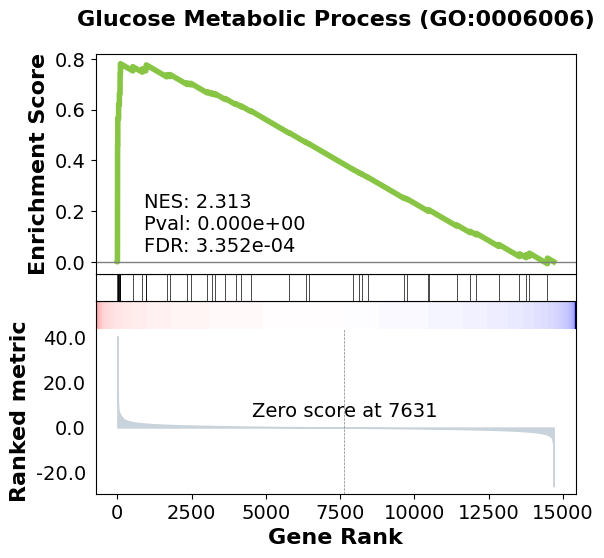

In [26]:
gseaplot(rank_metric=gsea_res.ranking,
         term = term_to_plot,
         **gsea_res.results[term_to_plot]
         
        )#, ofname='your.plot.pdf'。以your.plot.pdf的形式export，但會沒辦法在這裡看結果
#rank_metric代表下面的Ranked list metric
#term標題要寫哪個GO
#gsea_res.results底下的圖是哪個data

plt.savefig('my_gsea_plot.png',dpi=300,facecolor='white',bbox_inches='tight')
#用這個就可以同時「存圖」&「在這裡檢視圖片」了

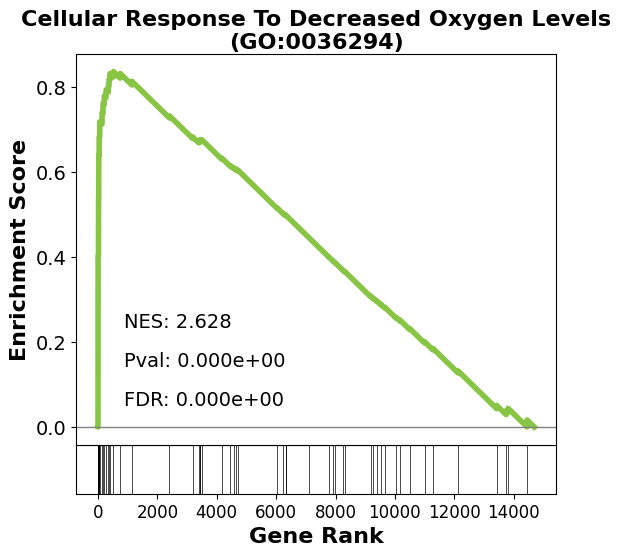

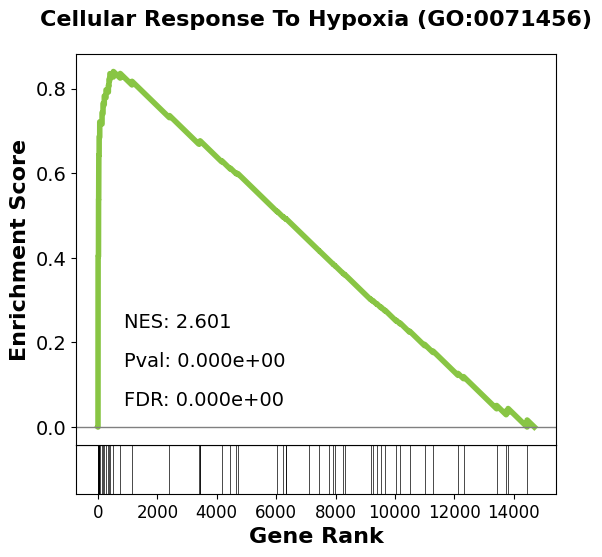

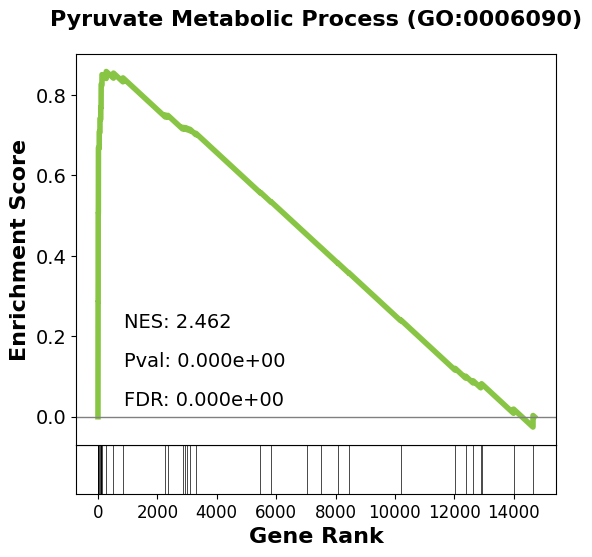

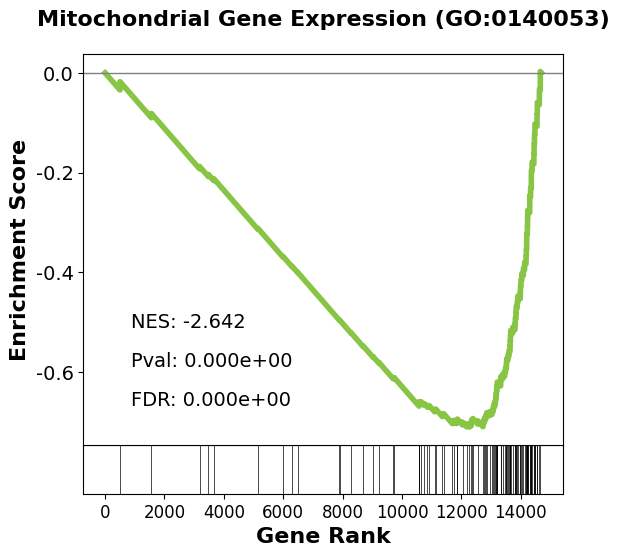

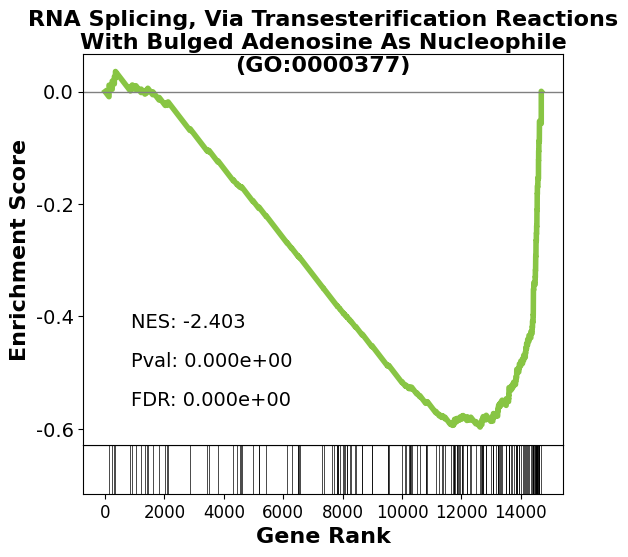

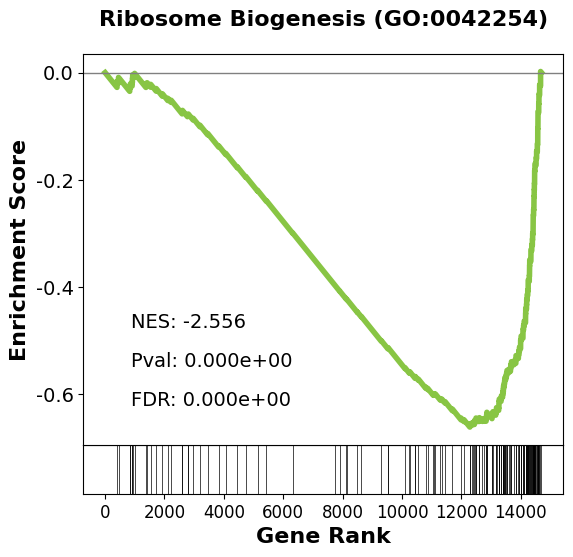

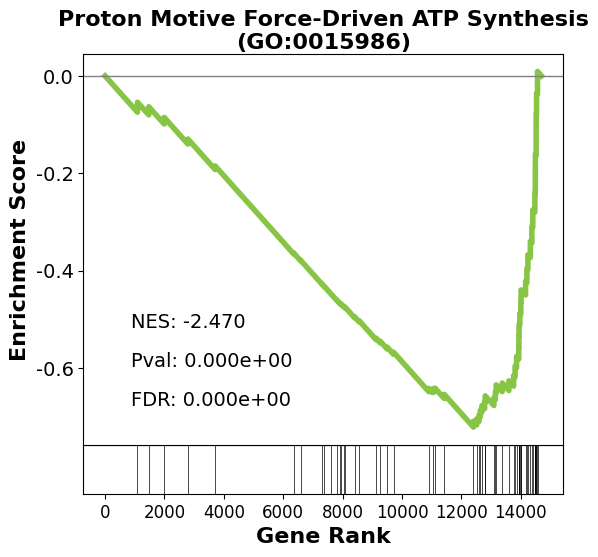

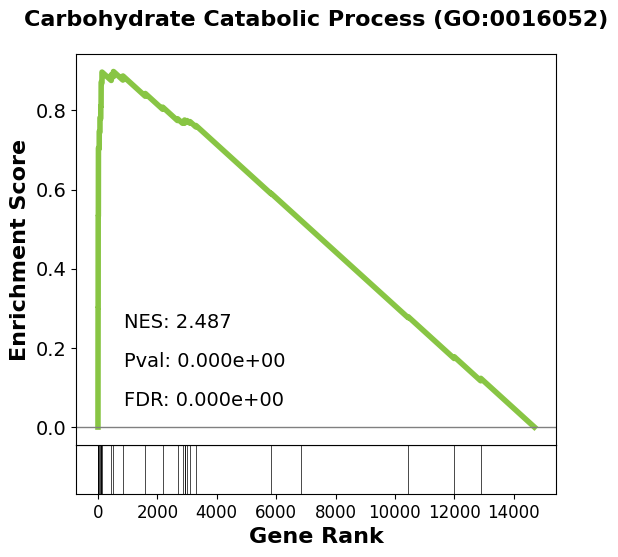

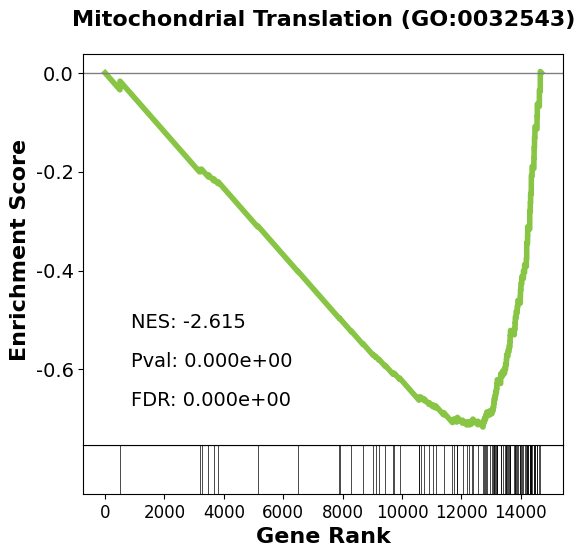

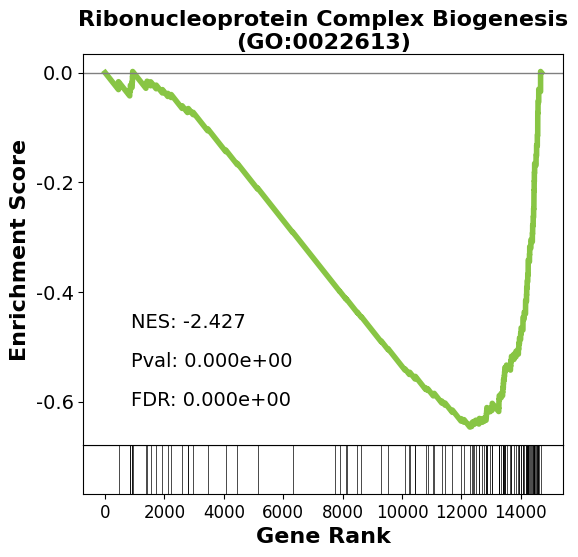

In [27]:
for term in df_out['Term'][0:10]:
    gseaplot(term = term, **gsea_res.results[term])
#把Ranked list metric拿掉，比較方便一次看很多圖(反正每張的Ranked list metric都一樣)

In [28]:
#做heatmap圖
# dds
dds.layers['normed_counts']

array([[ 23.58760052, 111.05828578,   1.96563338, ...,   7.86253351,
          6.87971682,   0.        ],
       [ 22.71079437, 104.66713927,   0.98742584, ...,   9.87425842,
          6.91198089,   0.        ],
       [ 21.53477047, 104.73729275,   1.95770641, ...,   8.80967883,
          5.87311922,   0.        ],
       [ 19.36094056,  76.42476538,   2.03799374, ...,   9.17097185,
          4.07598749,   1.01899687],
       [ 20.23446606,  84.98475747,   2.02344661, ...,  10.11723303,
          4.04689321,   1.0117233 ],
       [ 19.25516681,  92.22211472,   2.02685966, ...,   9.12086849,
          4.05371933,   1.01342983]])

In [29]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds.layers['log1p'] #在dds這個df加上log1p(壓縮normed_counts到一個區間)

array([[3.20224227, 4.71901914, 1.08709063, ..., 2.18183267, 2.06429197,
        0.        ],
       [3.1659304 , 4.66029396, 0.68684025, ..., 2.38639838, 2.06837818,
        0.        ],
       [3.11505947, 4.66095765, 1.08441411, ..., 2.28336953, 1.92761804,
        0.        ],
       [3.01361839, 4.3493067 , 1.11119734, ..., 2.31953777, 1.62452108,
        0.70260079],
       [3.05562562, 4.45417004, 1.10639744, ..., 2.40849643, 1.61877285,
        0.69899172],
       [3.00840991, 4.53498498, 1.10752567, ..., 2.31459948, 1.62012447,
        0.69983965]])

In [30]:
dds

AnnData object with n_obs × n_vars = 6 × 15665
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [31]:
dds.var_names

Index(['ENSG00000000003.10', 'ENSG00000000419.8', 'ENSG00000000457.9',
       'ENSG00000000460.12', 'ENSG00000000971.11', 'ENSG00000001036.9',
       'ENSG00000001084.6', 'ENSG00000001167.10', 'ENSG00000001460.13',
       'ENSG00000001461.12',
       ...
       'ENSGR0000167393.12', 'ENSGR0000169084.8', 'ENSGR0000169093.10',
       'ENSGR0000169100.8', 'ENSGR0000178605.8', 'ENSGR0000182378.8',
       'ENSGR0000182484.10', 'ENSGR0000197976.6', 'ENSGR0000214717.5',
       'ENSGR0000236017.3'],
      dtype='object', name='GeneID', length=15665)

In [32]:
dds.obs_names

Index(['HK-2 normoxia-1', 'HK-2 normoxia-2', 'HK-2 normoxia-3',
       'HK-2 hypoxia-1', 'HK-2 hypoxia-2', 'HK-2 hypoxia-3'],
      dtype='object', name='Sample')

In [33]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Rank,Symbol
GeneID,,,,,,,,
ENSG00000228253,11984.289354,-1.283893,0.049234,-26.077344,6.589763e-150,1.128991e-146,-26.077344,MT-ATP8
ENSG00000198938,3639.693364,-1.519038,0.061177,-24.830358,4.215413e-136,5.777644e-133,-24.830358,MT-CO3
ENSG00000198899,4671.051440,-1.149755,0.050668,-22.691722,5.407817e-114,4.632471e-111,-22.691722,MT-ATP6
ENSG00000212907,4852.798559,-0.734747,0.036561,-20.096614,7.900275e-90,3.867185e-87,-20.096614,MT-ND4L
ENSG00000198712,7550.992572,-1.183509,0.069628,-16.997685,8.542686e-65,3.081212e-62,-16.997685,MT-CO2
...,...,...,...,...,...,...,...,...
ENSG00000102144,1341.373225,1.662053,0.069622,23.872648,5.893110e-126,5.769355e-123,23.872648,PGK1
ENSG00000149925,1693.395813,1.053298,0.042879,24.564661,3.015560e-133,3.444272e-130,24.564661,ALDOA
ENSG00000104419,379.557715,4.714587,0.171065,27.560160,3.343540e-167,7.637761e-164,27.560160,NDRG1


In [34]:
#從res創建subset子集合
#篩選去掉gene expression在10以下、差異表現不夠明顯的gene
subset = res[res.baseMean >= 10] #去掉gene expression在10以下的gene
#去掉PValue在0.05以上(沒有統計上顯著差異)、差異倍數不夠大的Gene
subset = subset[(subset.padj < 0.05) & (abs(subset.log2FoldChange) > 0.5)]
subset

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Rank,Symbol
GeneID,,,,,,,,
ENSG00000228253,11984.289354,-1.283893,0.049234,-26.077344,6.589763e-150,1.128991e-146,-26.077344,MT-ATP8
ENSG00000198938,3639.693364,-1.519038,0.061177,-24.830358,4.215413e-136,5.777644e-133,-24.830358,MT-CO3
ENSG00000198899,4671.051440,-1.149755,0.050668,-22.691722,5.407817e-114,4.632471e-111,-22.691722,MT-ATP6
ENSG00000212907,4852.798559,-0.734747,0.036561,-20.096614,7.900275e-90,3.867185e-87,-20.096614,MT-ND4L
ENSG00000198712,7550.992572,-1.183509,0.069628,-16.997685,8.542686e-65,3.081212e-62,-16.997685,MT-CO2
...,...,...,...,...,...,...,...,...
ENSG00000102144,1341.373225,1.662053,0.069622,23.872648,5.893110e-126,5.769355e-123,23.872648,PGK1
ENSG00000149925,1693.395813,1.053298,0.042879,24.564661,3.015560e-133,3.444272e-130,24.564661,ALDOA
ENSG00000104419,379.557715,4.714587,0.171065,27.560160,3.343540e-167,7.637761e-164,27.560160,NDRG1


In [35]:
# dds_subset = dds[:, subset.index] #在dds裡創建subset子集合
# dds_subset

In [36]:
#用dds做heatmap
grapher = pd.DataFrame(dds.layers['log1p'].T,
                       index=dds.var_names,
                       columns=dds.obs_names)
#heatmap三大要素
#log1p壓縮後的表現量
#var_names基因ID
#obs_names樣本名稱
grapher

Sample,HK-2 normoxia-1,HK-2 normoxia-2,HK-2 normoxia-3,HK-2 hypoxia-1,HK-2 hypoxia-2,HK-2 hypoxia-3
GeneID,,,,,,
ENSG00000000003.10,3.202242,3.165930,3.115059,3.013618,3.055626,3.008410
ENSG00000000419.8,4.719019,4.660294,4.660958,4.349307,4.454170,4.534985
ENSG00000000457.9,1.087091,0.686840,1.084414,1.111197,1.106397,1.107526
ENSG00000000460.12,2.286999,2.386398,2.378484,2.213970,2.313081,2.209092
ENSG00000000971.11,1.087091,1.090194,1.084414,0.702601,1.106397,0.699840
...,...,...,...,...,...,...
ENSGR0000182378.8,1.373323,1.599328,1.370307,1.624521,1.618773,1.620124
ENSGR0000182484.10,2.548961,2.473313,2.465332,2.656544,2.718933,2.651451
ENSGR0000197976.6,2.181833,2.386398,2.283370,2.319538,2.408496,2.314599


c:\users\tim599\appdata\local\programs\python\python39\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\users\tim599\appdata\local\programs\python\python39\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


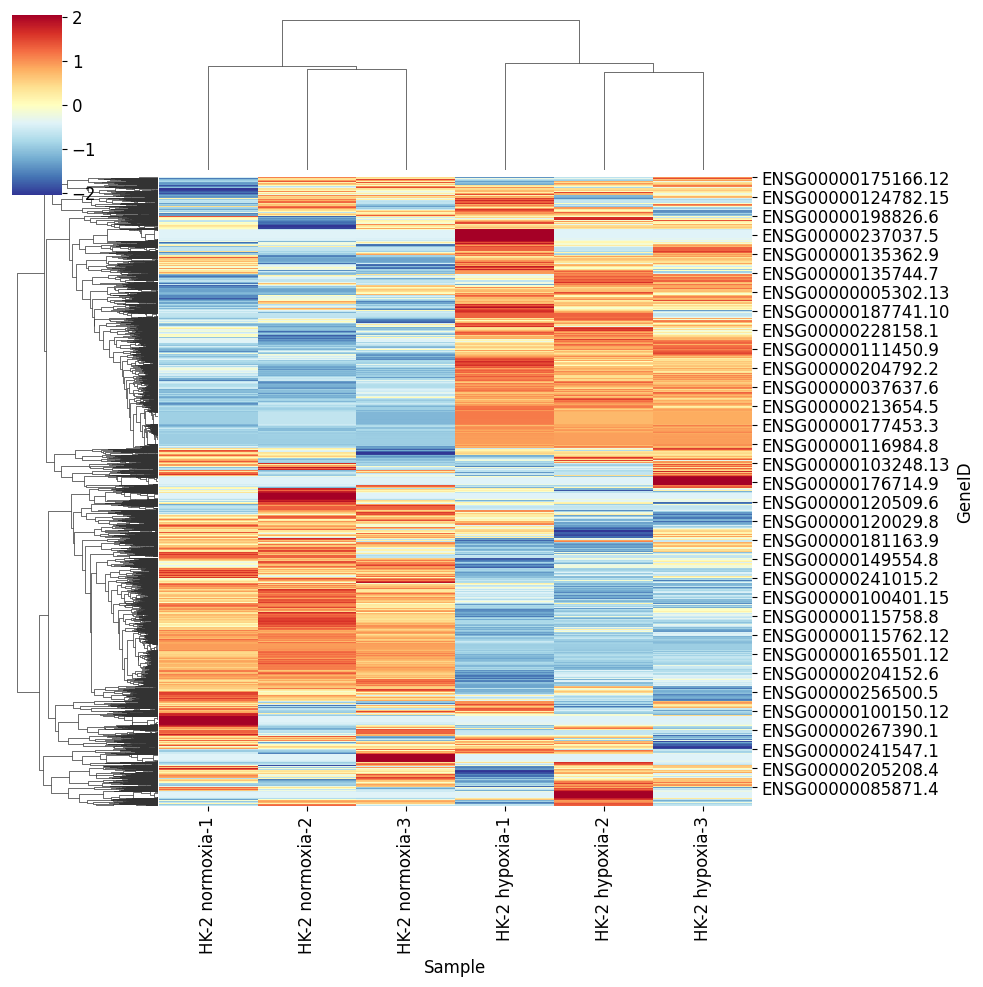

In [37]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')
plt.savefig('heatmap.png',dpi=300,facecolor='white',bbox_inches='tight')
#這個一定要放在這個cell裡面才會被存起來

In [38]:
# gseaplot(gsea_res.ranking, term = term_to_plot, **gsea_res.results[term_to_plot])

# plt.savefig('my_gsea_plot.png',dpi=300,facecolor='white',bbox_inches='tight')

In [39]:
# #使用gseapy做GSEA
# ranking = res2[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
# ranking
# # ranking.head() #看前5個sample
# # ranking.shape #看是幾*幾的列表

In [40]:
# manual_set = {'things':['STAU2', 'USP53', 'SERPINE1', 'TMEM178B', 'PSAP']}

In [41]:
# pre_res2 = gp.prerank(rnk=ranking, # or rnk = rnk,
#                      gene_sets='KEGG_2016',
#                      threads=4,
#                      min_size=5,
#                      max_size=1000,
#                      permutation_num=1000, # reduce number to speed up testing
#                      outdir=None, # don't write to disk
#                      seed=6,
#                      verbose=True, # see what's going on behind the scenes
#                     )

In [42]:
# # gp.get_library_name() #to look at available libraries看有哪些資料庫的基因名稱
# pre_res2 = gp.prerank(rnk = ranking,
#                      gene_sets = ['GO_Biological_Process_2021', manual_set],
#                      seed = 6, permutation_num = 100) #數字越大越準，但跑越久

# # pre_res = gp.prerank(rnk = ranking,
# #                      gene_sets = 'GO_Biological_Process_2021',
# #                      seed = 6) #數字越大越準，但跑越久

# pre_res